In [37]:
import matplotlib
import matplotlib.pyplot as plt
import glob
import codecs
import numpy as np
import pandas as pd
import os
from ipywidgets import Output
from scipy.optimize import curve_fit
import seaborn as sns
from matplotlib import ticker
%matplotlib inline

In [38]:
# 測定温度を入力、低温から順に
temperature_list = [0, 15, 30]
data_dir = "result/20220921 5HB/"

df_params_all = pd.DataFrame()

for i, temp in enumerate(temperature_list):
    data = data_dir + str(temperature_list[i]) + "/kinetic_parameters/" + str(temperature_list[i]) + "_parameters.csv"
    with codecs.open(data, "r", "UTF-8", "ignore") as file:
        df = pd.read_csv(file, index_col=0)
        
        df_params_all = pd.concat([df_params_all, df], axis=0)




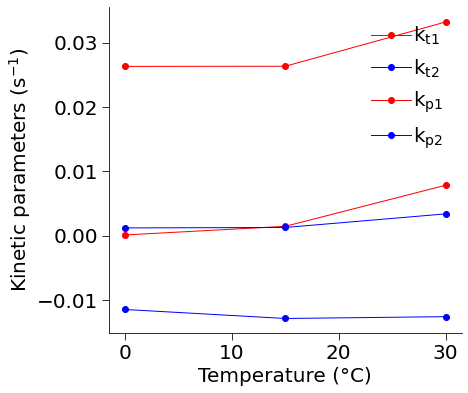

In [58]:
# x_min = 0
# x_max = 17.5
# x_ticks = [0, 5*(10**7), 10*(10**7), 15*(10**7)]

# ラベルに10^7を表示するのでx軸を10^7で割る
x = df_params_all.index.values
y_kt1 = df_params_all["k_t1"]
y_kt2 = df_params_all["k_t2"]
y_kp1 = df_params_all["k_p1"]
y_kp2 = df_params_all["k_p2"]

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 20

#軸主目盛り線の長さ
plt.rcParams["xtick.major.size"] = 7
plt.rcParams["ytick.major.size"] = 7
#x軸補助目盛り線の長さ
plt.rcParams["xtick.minor.size"] = 4

plt.rcParams["legend.frameon"] = False

fig, ax = plt.subplots(1, 1, figsize=(7, 6))
ax.set_xlabel('Temperature (°C)')
# ax.set_xlabel('Light intensity ($10^{7}$ count $\mathrm{cm^{-1}}$)')
ax.set_ylabel('Kinetic parameters ($\mathrm{s^{-1}}$)')

# 軸の最大値、最小値、表示メモリ設定
# ax.set_xlim(x_min, x_max)
# ax.set_xticks(x_ticks)

# x軸ラベルの下に空間を生成
# ax.get_xaxis().set_tick_params(pad=8)

# 目盛りを外に出す
ax.tick_params(direction='out')

# 2.5間隔で補助メモリ
# ax.xaxis.set_minor_locator(ticker.MultipleLocator(7.5))

# ×10表記
# ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
# ax.get_xaxis().get_offset_text().set_position((1.1,0))

# 枠線の消去
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.subplots_adjust(left=0.2)
ax.plot(x, y_kt1, marker="o", color="red", lw='1', label="$\mathrm{k_{t1}}$")
ax.plot(x, y_kt2, marker="o", color="blue", lw='1', label="$\mathrm{k_{t2}}$")
ax.plot(x, y_kp1, marker="o", color="red", lw='1', label="$\mathrm{k_{p1}}$")
ax.plot(x, y_kp2, marker="o", color="blue", lw='1', label="$\mathrm{k_{p2}}$")

# 凡例表示
ax.legend(handletextpad=0.1)